In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Jun-24


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/2/2f/Shark_Tank_India.jpg', width=330, height=330)

# ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

# ⏳ Check and import dataset

In [4]:
shark_tank = pd.read_csv('Shark Tank India.csv')
 
nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')


There are 320 rows and 64 columns in the dataset


# 💵 Exploratory Data Analysis (EDA)

In [6]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  \
0              1    20-Dec-21  04-Feb-22               1   
1              1    20-Dec-21  04-Feb-22               1   
2              1    20-Dec-21  04-Feb-22               1   
3              1    20-Dec-21  04-Feb-22               2   
4              1    20-Dec-21  04-Feb-22               2   

                 Episode Title  Pitch Number      Startup Name  \
0  Badlegi Business Ki Tasveer             1     BluePineFoods   
1  Badlegi Business Ki Tasveer             2      BoozScooters   
2  Badlegi Business Ki Tasveer             3  HeartUpMySleeves   
3      Insaan, Ideas Aur Sapne             4         TagzFoods   
4      Insaan, Ideas Aur Sapne             5      HeadAndHeart   

                       Industry  \
0                          Food   
1  Vehicles/Electrical Vehicles   
2                Beauty/Fashion   
3                          Food   
4                     Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Number of Presenters  Male Presenters  \
0     https://bluepinefoods.com/                     3              2.0   
1        https://www.boozup.net/                     1              1.0   
2  https://heartupmysleeves.com/                     1              NaN   
3         https://tagzfoods.com/                     2              2.0   
4             https://thehnh.in/                     4              1.0   

   Female Presenters  Transgender Presenters  Couple Presenters  \
0                1.0                     NaN                0.0   
1                NaN                     NaN                0.0   
2                1.0                     NaN                0.0   
3                NaN                     NaN                0.0   
4                3.0                     NaN                1.0   

  Pitchers Average Age  Started in Pitchers City Pitchers State  \
0               Middle      2016.0         Delhi          Delhi   
1                Young      2017.0     Ahmedabad        Gujarat   
2                Young      2021.0         Delhi          Delhi   
3               Middle      2019.0     Bangalore      Karnataka   
4               Middle      2015.0       Patiala         Punjab   

   Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  \
0            95.0            8.0           NaN         NaN   
1             4.0            0.4           NaN         NaN   
2             NaN            2.0           NaN         NaN   
3           700.0            NaN          48.0         NaN   
4            30.0            NaN           NaN         NaN   

   Original Ask Amount  Original Offered Equity  ...  \
0                 50.0                      5.0  ...   
1                 40.0                     15.0  ...   
2                 25.0                     10.0  ...   
3                 70.0                      1.0  ...   
4                 50.0                      5.0  ...   

   Namita Investment Amount  Namita Investment Equity  Namita Debt Amount  \
0                       NaN                       NaN                 NaN   
1                       NaN                       NaN                 NaN   
2                       NaN                       NaN                 NaN   
3                       NaN                       NaN                 NaN   
4                       NaN                       NaN                 NaN   

   Anupam Investment Amount  Anupam Investment Equity  Anupam Debt Amount  \
0                       NaN                       NaN                 NaN   
1                       NaN                       NaN                 NaN   
2                      12.5                      15.0       

In [7]:
shark_tank.tail(10).T

310  \
Season Number                                             2   
Season Start                                      02-Jan-23   
Season End                                        10-Mar-23   
Episode Number                                           49   
Episode Title            Businesses Adding Value To Society   
...                                                     ...   
Amit Debt Amount                                        NaN   
Guest Investment Amount                                 NaN   
Guest Investment Equity                                 NaN   
Guest Debt Amount                                       NaN   
Guest Name                                              NaN   

                                                        311  \
Season Number                                             2   
Season Start                                      02-Jan-23   
Season End                                        10-Mar-23   
Episode Number                                           49   
Episode Title            Businesses Adding Value To Society   
...                                                     ...   
Amit Debt Amount                                        NaN   
Guest Investment Amount                                 NaN   
Guest Investment Equity                                 NaN   
Guest Debt Amount                                       NaN   
Guest Name                                              NaN   

                                                        312  \
Season Number                                             2   
Season Start                                      02-Jan-23   
Season End                                        10-Mar-23   
Episode Number                                           49   
Episode Title            Businesses Adding Value To Society   
...                                                     ...   
Amit Debt Amount                                        NaN   
Guest Investment Amount                                 NaN   
Guest Investment Equity                                 NaN   
Guest Debt Amount                                       NaN   
Guest Name                                              NaN   

                                                        313  \
Season Number                                             2   
Season Start                                      02-Jan-23   
Season End                                        10-Mar-23   
Episode Number                                           49   
Episode Title            Businesses Adding Value To Society   
...                                                     ...   
Amit Debt Amount                                       65.0   
Guest Investment Amount                                 NaN   
Guest Investment Equity                                 NaN   
Guest Debt Amount                                       NaN   
Guest Name                                              NaN   

                                                   314  \
Season Number                                        2   
Season Start                                 02-Jan-23   
Season End                                   10-Mar-23   
Episode Number                                      50   
Episode Title            Season Finale With The Sharks   
...                                                ...   
Amit Debt Amount                                   NaN   
Guest Investment Amount                            NaN   
Guest Investment Equity                            NaN   
Guest Debt Amount                                  NaN   
Guest Name                                         NaN   

                                                   315  \
Season Number                                        2   
Season Start                                 02-Jan-23   
Season End                                   10-Mar-23   
Episode Number                                      50   
Episode Title            Season Finale Wi

In [8]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Number of Presenters'] = shark_tank['Number of Presenters'].astype(pd.Int32Dtype())
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Transgender Presenters'] = shark_tank['Transgender Presenters'].astype(pd.Int32Dtype())
shark_tank['Couple Presenters'] = shark_tank['Couple Presenters'].astype(pd.Int32Dtype())

shark_tank['Gross Margin'] = shark_tank['Gross Margin'].astype(pd.Int32Dtype())
shark_tank['Net Margin'] = shark_tank['Net Margin'].astype(pd.Int32Dtype())

shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())

shark_tank['Received Offer'] = shark_tank['Received Offer'].astype(pd.Int32Dtype())
shark_tank['Accepted Offer'] = shark_tank['Accepted Offer'].astype(pd.Int32Dtype())

In [9]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})


In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              320 non-null    Int32  
 1   Season Start               320 non-null    object 
 2   Season End                 320 non-null    object 
 3   Episode Number             320 non-null    Int32  
 4   Episode Title              320 non-null    object 
 5   Pitch Number               320 non-null    Int32  
 6   Startup Name               320 non-null    object 
 7   Industry                   320 non-null    object 
 8   Business Description       320 non-null    object 
 9   Company Website            309 non-null    object 
 10  Number of Presenters       320 non-null    Int32  
 11  Male Presenters            281 non-null    Int32  
 12  Female Presenters          149 non-null    Int32  
 13  Transgender Presenters     3 non-null      Int32  

In [11]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [12]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 2
Number of unique values in Season Start - 2
Number of unique values in Season End - 2
Number of unique values in Episode Number - 52
Number of unique values in Episode Title - 87
Number of unique values in Pitch Number - 320
Number of unique values in Startup Name - 320
Number of unique values in Industry - 16
Number of unique values in Business Description - 319
Number of unique values in Company Website - 309
Number of unique values in Number of Presenters - 6
Number of unique values in Male Presenters - 6
Number of unique values in Female Presenters - 3
Number of unique values in Transgender Presenters - 1
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Started in - 14
Number of unique values in Pitchers City - 78
Number of unique values in Pitchers State - 34
Number of unique values in Yearly Revenue - 69
Number of unique values in Monthly Sales - 72
Number o

# 🏦 Season one/two of SHARK TANK INDIA was broadcasted in SonyLiv OTT and Sony TV

In [13]:
shark_tank_season1 = shark_tank.loc[shark_tank['Season Number']==1]
shark_tank_season1_without_unseen = shark_tank.loc[(shark_tank['Season Number']==1) & (shark_tank['Episode Number']!=0)]
shark_tank_season2 = shark_tank.loc[(shark_tank['Season Number']==2) | (shark_tank['Season Number'].isnull())]

In [14]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print("In Season 1, in", shark_tank_season1['Episode Number'].max(), "episodes, there were", shark_tank_season1.loc[shark_tank_season1['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season1.loc[shark_tank_season1['Episode Number']==0]['Startup Name'].count(),"unseen pitches\n")
print("In Season 2, in", shark_tank_season2['Episode Number'].max(), "episodes, there were", shark_tank_season2.loc[shark_tank_season2['Episode Number']!=0]['Startup Name'].count(), "(real) pitches\n")


2 seasons 

320 startup companies came for pitching 

In Season 1, in 36 episodes, there were 122 (real) pitches and 30 unseen pitches

In Season 2, in 51 episodes, there were 168 (real) pitches



In [15]:
# There were 2 to 4 pitches, in a each episode
print(shark_tank.loc[shark_tank['Episode Number']!=0][['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())


[2 3 4]


In [16]:
# Types of industries, came for investment, in season 1
tmp = shark_tank_season1['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 1 - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()


In [17]:
# Types of industries, came for investment, in season 2
tmp = shark_tank_season2['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank India Season 2 - Industry wise startups</b>", template='simple_white', text=tmp, width=820, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [18]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")
print("")
print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")
print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")
print("Total transgender pitchers -", int(shark_tank['Transgender Presenters'].sum()), "\n")
print("")
print("COVID entrepreneurs/startups - ", shark_tank.loc[shark_tank['Started in']==2020]['Startup Name'].count(), sep='')

Total pitchers - 665 


Total male pitchers - 484 

Total female pitchers - 178 

Total transgender pitchers - 3 


COVID entrepreneurs/startups - 31


Male entrepreneurs percentage - 72.78%

Female entrepreneurs percentage - 26.77%

Transgender entrepreneurs percentage - 0.45%

Couple entrepreneurs percentage - 9.0%




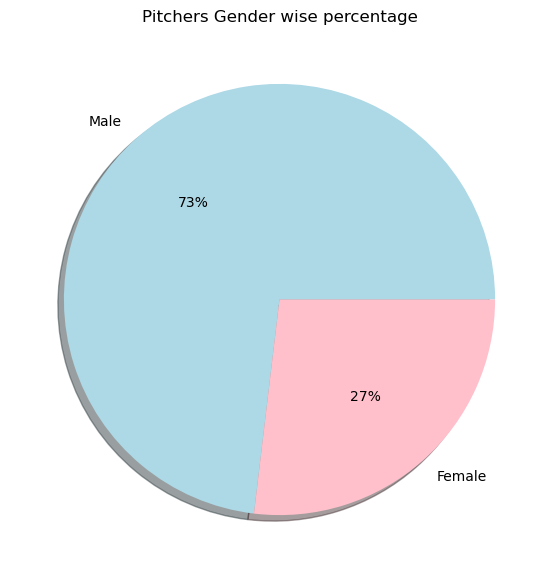

In [19]:
print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Transgender entrepreneurs percentage - ", round(shark_tank['Transgender Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("")

fig = plt.figure(figsize =(10, 7))
plt.title("Pitchers Gender wise percentage")
plt.pie([round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2)], labels = ["Male","Female"],autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True)
plt.show()

Middle    231
Young      88
Old         1
Name: Pitchers Average Age, dtype: int64 

Middle    72%
Young     28%
Old        0%
Name: Pitchers Average Age, dtype: object 



<AxesSubplot:title={'center':'Pitchers Age wise percentage'}, ylabel='Pitchers Average Age'>

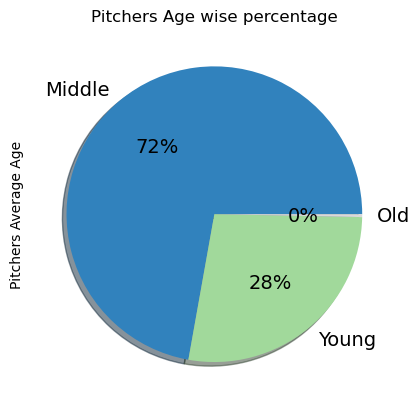

In [20]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)


# 💹 68% companies received offers and 32% startups could not convince Sharks to invest

1    216
0    104
Name: Received Offer, dtype: Int64 

1    68%
0    32%
Name: Received Offer, dtype: object


<AxesSubplot:ylabel='Received Offer'>

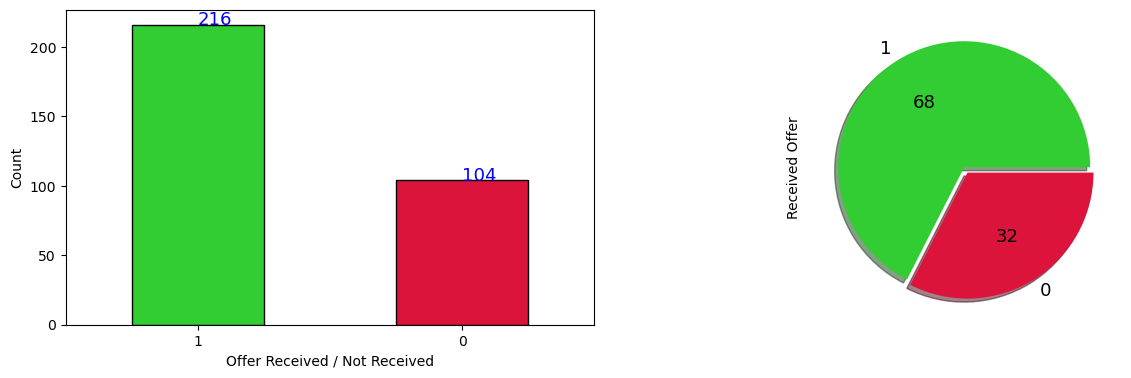

In [21]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 216 companies received offers & 104 startups could not convince #Sharks to invest.

# ＄ 81% companies accepted offers and 19% startups didn't accept Sharks offer

1    176
0     40
Name: Accepted Offer, dtype: Int64 

1    81%
0    19%
Name: Accepted Offer, dtype: object


<AxesSubplot:ylabel='Accepted Offer'>

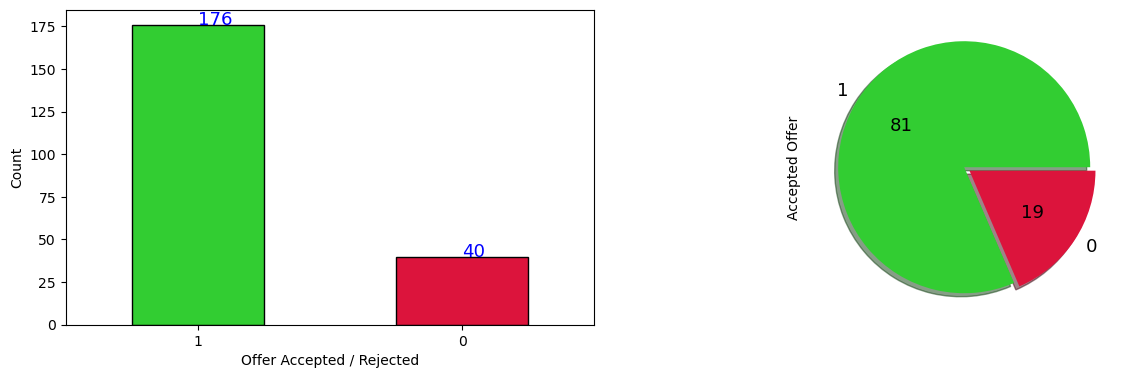

In [22]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Accepted / Rejected")
plt.ylabel("Count")
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 176 companies accepted investments they got & 40 #Startups did not accept Shark's offer.

# ❗ Shark Tank India data set Visualizations/infographics in Tableau Public —¶

In [23]:
IFrame('https://public.tableau.com/views/SharkTankIndia_16448181343920/SharkTankIndiaStory', width=1100, height=1000)

In [24]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher - Rs.", round(shark_tank["Original Ask Amount"].max()/100), "crores")

Maximum amount requested, by a pitcher - Rs. 300 crores


In [25]:
# Least amount requested
print("Least amount requested, by a pitcher - Rs.", round(shark_tank["Original Ask Amount"].min()*100000))

Least amount requested, by a pitcher - Rs. 0


In [26]:
# Offers rejected by pitchers/startup companies
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]
 

Season Number        Startup Name                      Industry  \
6                1          qZenseLabs                          Food   
19               1            Torch-it                     Education   
21               1         LaKheerDeli                          Food   
27               1       KabiraHandmad                          Food   
41               1    MorrikoPureFoods                          Food   
55               1      IndiaHempandCo                          Food   
60               1           KetoIndia                          Food   
70               1           Moonshine                          Food   
71               1             Falhari                          Food   
73               1         UrbanMonkey                Beauty/Fashion   
74               1       GuardianGears                 Manufacturing   
81               1              Alpino                          Food   
87               1  AlisteTechnologies           Technology/Software   
93               1           PDDFalcon                 Manufacturing   
94               1           PlayBoxTV                      Services   
104              1      ExperentialEtc           Technology/Software   
106              1          C3Med-Tech                Medical/Health   
113              1        GreenProtein                          Food   
116              1               Woloo           Technology/Software   
119              1         FrenchCrown                Beauty/Fashion   
121              1            Devnagri           Technology/Software   
131              1           Scintiglo                Medical/Health   
135              1           UrbanNaps                      Services   
138              1            Picsniff           Technology/Software   
149              1             Artment                Beauty/Fashion   
151              1                Eume                Beauty/Fashion   
158              2          ATMOSPHERE                          Food   
165              2           Flatheads                Beauty/Fashion   
189              2             Diabexy                          Food   
199              2        AvimeeHerbal                Beauty/Fashion   
206              2                 PMV  Vehicles/Electrical Vehicles   
212              2      CheeseCake&Co.                          Food   
215              2              BeUnic                      Services   
229              2          GavinParis                Beauty/Fashion   
233              2          HobbyIndia          Furnishing/Household   
237              2            DesiToys                 Manufacturing   
245              2              Tipayi                 Manufacturing   
256              2  MidNightAngelsByPC                Beauty/Fashion   
278              2      TwistingScoops                          Food   
316              2              GODESi                          Food   

     Original Ask Amount  Original Offered Equity  
6                  100.0                     0.25  
19                  75.0                     1.00  
21                  50.0                     7.50  
27                 100.0                     5.00  
41                 100.0                     3.00  
55                  50.0                     4.00  
60                 150.0                     1.25  
70                  80.0                     0.50  
71                  50.0                     2.00  
73                 100.0                     1.00  
74                  30.0                     5.00  
81                 150.0                     2.00  
87                  60.0                     5.00  
93                  75.0                     3.00  
94                 100.0                     3.50  
104                200.0                     4.00  
106                 35.0                     6.00  
113                 60.0                     2.00  
116                 50.0                     4.00  
119         

In [27]:
# Sum of investment amount asked, in Shark Tank, in India
print("Sum of investment amount asked, by all startup companies, in Indian Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")
 

Sum of investment amount asked, by all startup companies, in Indian Shark Tank - ₹540.41 crores


In [28]:
# Amount invested by all sharks, in India SharkTank
print("Amount invested by all sharks, in Shark Tank India -", format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")
 

Amount invested by all sharks, in Shark Tank India - ₹110.06 crores


In [29]:
# Sum of loan/debt amount, in India Shark Tank
print("Sum of loan/debt amount, given by all sharks, in India SharkTank -", format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")
 

Sum of loan/debt amount, given by all sharks, in India SharkTank - ₹18.11 crores


In [30]:
# Top 40 investments, as per total investment/deal amount (in lakhs)
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(40))

tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:40]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'])
fig.show()
 

Startup Name
MeduLance             200.0
Pharmallama           200.0
UnStop                200.0
AasVidyalaya          150.0
Portl                 150.0
Snitch                150.0
Stage                 150.0
Trunome               150.0
MindPeers             106.0
Annie                 105.0
Broomees              100.0
GearHeadMotors        100.0
Geeani                100.0
Get-A-Whey            100.0
HammerLifestyle       100.0
Haqdarshak            100.0
Hoovu                 100.0
HumpyA2               100.0
INACAN                100.0
InsuranceSamadhan     100.0
Janitri               100.0
NeoMotion             100.0
NishHair              100.0
PadCare               100.0
Proxgy                100.0
RaisingSuperstars     100.0
RevampMoto            100.0
Rubans                100.0
Sahayatha             100.0
SkippiIcePops         100.0
SunfoxTechnologies    100.0
TheGreenSnack         100.0
TheRenalProject       100.0
TheYarnBazaar         100.0
WatchoutWearables     100.0
Winston

In [31]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Sid07Designs          75.00
BoozScooters          50.00
IsakFragrances        50.00
HammerLifestyle       40.00
KGAgrotech            40.00
TheSassBar            35.00
VivalyfInnovations    33.33
GoldSafeSolutions     30.00
HeartUpMySleeves      30.00
JainShikanji          30.00
ColourMeMad-CMM       25.00
CosIQ                 25.00
FindYourKicksIndia    25.00
HoloKitab             25.00
PNT                   25.00
Raasa                 25.00
LOKA                  24.00
TheQuirkyNaari        24.00
WakaoFoods            21.00
Angrakhaa             20.00
Name: Total Deal Equity, dtype: float64


In [32]:
# Top 20 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'])
fig.show()

Startup Name
Stage                150.0
WatchoutWearables    100.0
uBreathe             100.0
Otua                  99.0
Wol3D                 70.0
TAC                   69.0
maisha                65.0
Hood                  60.0
iMumz                 60.0
AyuSynk               50.0
DailyDump             50.0
Freebowler            50.0
GROWiT                50.0
LilGoodness           50.0
NamhyaFoods           50.0
NutriCook             50.0
Rubans                50.0
StoreMyGoods          50.0
Aadvik                45.0
VSMani                41.0
Name: Total Deal Debt, dtype: float64


In [33]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Total Deal Debt'].count(),"\n")
shark_tank.loc[shark_tank['Total Deal Debt'] > 0][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]
 

Number of startups who got debt/loan amount 39 



Season Number       Startup Name  Original Ask Amount  Total Deal Amount  \
8                1               NOCD                 50.0               20.0   
44               1                PNT                 50.0               25.0   
46               1        BambooIndia                 80.0               50.0   
56               1               Otua                100.0                1.0   
62               1      TheStatePlate                 65.0               40.0   
66               1       Sid07Designs                 47.0               25.0   
72               1        NamhyaFoods                100.0               50.0   
77               1         KGAgrotech                 30.0               10.0   
120              1       StoreMyGoods                100.0               50.0   
156              2  WatchoutWearables                200.0              100.0   
157              2              SoupX                 75.0               50.0   
159              2              Stage                300.0              150.0   
163              2        Brandsdaddy                 70.0               35.0   
172              2            AyuSynk                100.0               50.0   
180              2         Freebowler                 75.0               25.0   
183              2          DailyDump                 80.0               30.0   
196              2             VSMani                 60.0               19.0   
201              2             ekatra                 40.0               20.0   
204              2          licksters                 50.0               25.0   
213              2             Dabble                 50.0               15.0   
218              2          HoneyVeda                 75.0               50.0   
220              2  SwadeshiBlessings                 50.0               25.0   
231              2            BlueTea                 75.0               50.0   
248              2            Pabiben                 50.0               10.0   
249              2          Homestrap                 70.0               50.0   
250              2           uBreathe                150.0               50.0   
252              2              iMumz                 70.0               10.0   
254              2           Freakins                 70.0               50.0   
277              2               Hood                120.0               60.0   
279              2             GROWiT                100.0               50.0   
282              2              Wol3D                150.0               80.0   
290              2             Aadvik                 60.0               15.0   
296              2          NutriCook                100.0               50.0   
297              2             Subhag                 50.0               20.0   
306              2             Rubans                150.0              100.0   
309              2        LilGoodness                100.0               50.0   
313              2             maisha                 75.0               10.0   
317              2                TAC                150.0               81.0   
318              2         Naara-Aaba                 75.0               50.0   

     Total Deal Equity  Total Deal Debt  
8                15.00             30.0  
44               25.00             25.0  
46                3.50             30.0  
56                1.00             99.0  
62                3.00             25.0  
66               75.00             22.0  
72               10.00             50.0  
77               40.00             20.0  
120               4.00             50.0  
156              10.00            100.0  
157              18.00             25.0  
159               0.60            150.0  
163               5.00             35.0  
172               3.50             50.0  
180               7.50             50.0  
183               4.00             50.0  
196               1.00             41.0  
201     

# 💰 Which shark invested most ?

In [34]:
# Maximum Investment - as per Investment Amount
print("Maximum Investment - as per Investment Amount")
print("Aman invested in Season 1 -", round(max(shark_tank_season1['Ashneer Investment Amount'].sum()/100, shark_tank_season1['Namita Investment Amount'].sum()/100, shark_tank_season1['Anupam Investment Amount'].sum()/100, shark_tank_season1['Vineeta Investment Amount'].sum()/100,
    shark_tank_season1['Aman Investment Amount'].sum()/100, shark_tank_season1['Peyush Investment Amount'].sum()/100, shark_tank_season1['Ghazal Investment Amount'].sum()/100, shark_tank_season1['Amit Investment Amount'].sum()/100),2), "crores")
print("Aman invested in Season 2 -", round(max(shark_tank_season2['Namita Investment Amount'].sum()/100, shark_tank_season2['Anupam Investment Amount'].sum()/100, shark_tank_season2['Vineeta Investment Amount'].sum()/100,
    shark_tank_season2['Aman Investment Amount'].sum()/100, shark_tank_season2['Peyush Investment Amount'].sum()/100, shark_tank_season2['Ghazal Investment Amount'].sum()/100, shark_tank_season2['Amit Investment Amount'].sum()/100),2), "crores")
 

Maximum Investment - as per Investment Amount
Aman invested in Season 1 - 8.97 crores
Aman invested in Season 2 - 16.13 crores


In [35]:
# Minimum Investment - as per Investment Amount
print("Minimum Investment - as per Investment Amount")
print("Ghazal invested in Season 1 -", round(min(shark_tank_season1['Ghazal Investment Amount'].sum()/100, shark_tank_season1['Namita Investment Amount'].sum()/100, shark_tank_season1['Anupam Investment Amount'].sum()/100, shark_tank_season1['Vineeta Investment Amount'].sum()/100,
    shark_tank_season1['Aman Investment Amount'].sum()/100, shark_tank_season1['Peyush Investment Amount'].sum()/100, shark_tank_season1['Ghazal Investment Amount'].sum()/100),2), "crores")
print("Amit invested in Season 2 -", round(min(shark_tank_season2['Amit Investment Amount'].sum()/100, shark_tank_season2['Namita Investment Amount'].sum()/100, shark_tank_season2['Anupam Investment Amount'].sum()/100, shark_tank_season2['Vineeta Investment Amount'].sum()/100,
    shark_tank_season2['Aman Investment Amount'].sum()/100, shark_tank_season2['Peyush Investment Amount'].sum()/100, shark_tank_season2['Amit Investment Amount'].sum()/100),2), "crores")


Minimum Investment - as per Investment Amount
Ghazal invested in Season 1 - 1.6 crores
Amit invested in Season 2 - 8.01 crores


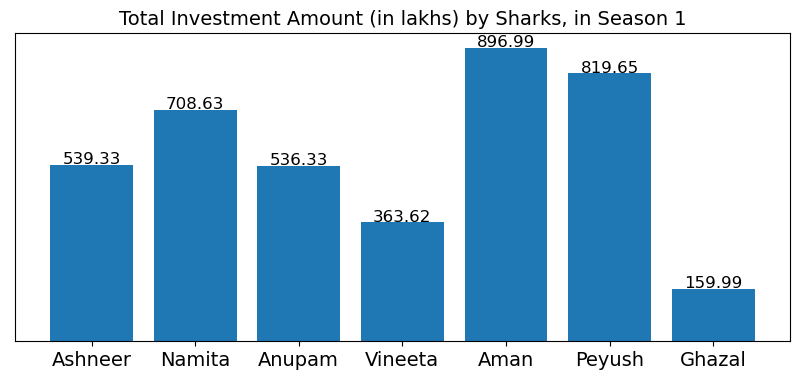

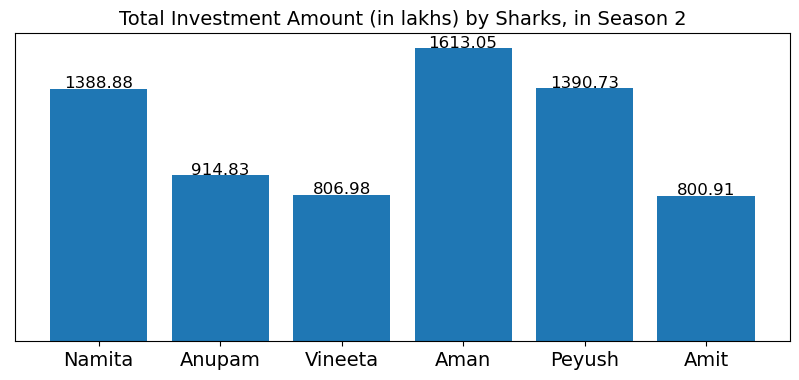

In [36]:
# Amount Invested by sharks
# Season 1
Amount = [shark_tank_season1['Ashneer Investment Amount'].sum(), shark_tank_season1['Namita Investment Amount'].sum(), shark_tank_season1['Anupam Investment Amount'].sum(), shark_tank_season1['Vineeta Investment Amount'].sum(),
    shark_tank_season1['Aman Investment Amount'].sum(), shark_tank_season1['Peyush Investment Amount'].sum(), shark_tank_season1['Ghazal Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in lakhs) by Sharks, in Season 1", fontsize=14)
plt.show()

# Season 2
Amount = [shark_tank_season2['Namita Investment Amount'].sum(), shark_tank_season2['Anupam Investment Amount'].sum(), shark_tank_season2['Vineeta Investment Amount'].sum(),
    shark_tank_season2['Aman Investment Amount'].sum(), shark_tank_season2['Peyush Investment Amount'].sum(), shark_tank_season2['Amit Investment Amount'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in lakhs) by Sharks, in Season 2", fontsize=14)
plt.show()

In [37]:
# Maximum Equity - who received maximum shares
print("Maximum Equity - who received maximum shares")
print("Peyush got equity of -", round(max(shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()),2), "% in different companies, in season 1")
print("Namita got equity of -", round(max(shark_tank_season2['Ashneer Investment Equity'].sum(), shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()),2), "% in different companies, in season 2")
 

Maximum Equity - who received maximum shares
Peyush got equity of - 322.84 % in different companies, in season 1
Namita got equity of - 158.01 % in different companies, in season 2


In [38]:
# Minimum Equity - who received least amount of shares
print("Minimum Equity - who received least amount of shares")
print("Ghazal got equity of -", round(min(shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()),2), "% in different companies, in season 1")
print("Aman got equity of -", round(min(shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()),2), "% in different companies, in season 2")


Minimum Equity - who received least amount of shares
Ghazal got equity of - 51.7 % in different companies, in season 1
Aman got equity of - 91.69 % in different companies, in season 2


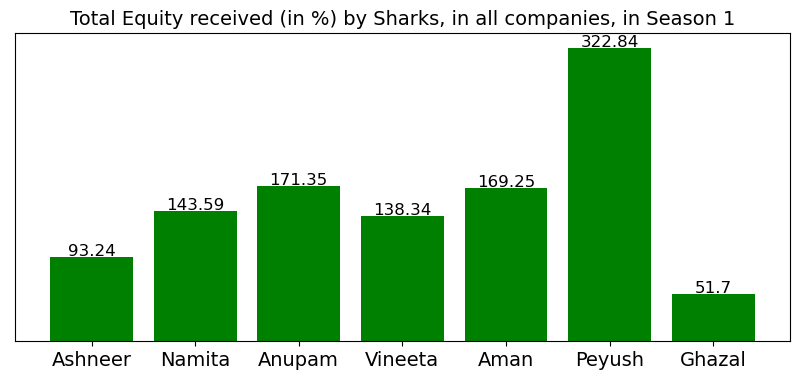

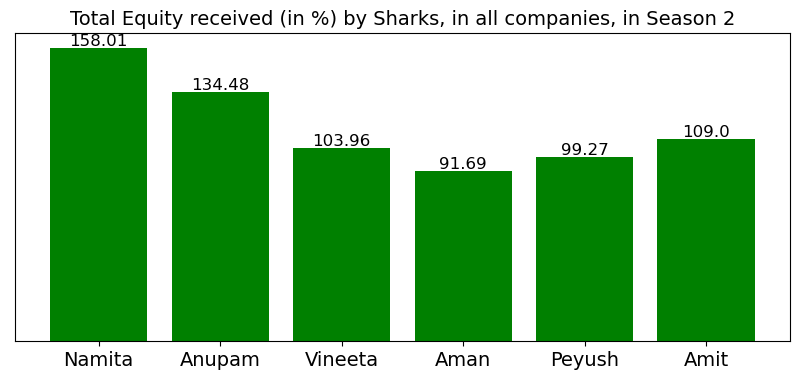

In [39]:
# Equity received by sharks
# Season 1
Equity = [shark_tank_season1['Ashneer Investment Equity'].sum(), shark_tank_season1['Namita Investment Equity'].sum(), shark_tank_season1['Anupam Investment Equity'].sum(), shark_tank_season1['Vineeta Investment Equity'].sum(),
    shark_tank_season1['Aman Investment Equity'].sum(), shark_tank_season1['Peyush Investment Equity'].sum(), shark_tank_season1['Ghazal Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+1, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received (in %) by Sharks, in all companies, in Season 1", fontsize=14)
plt.show()

# Season 2
Equity = [shark_tank_season2['Namita Investment Equity'].sum(), shark_tank_season2['Anupam Investment Equity'].sum(), shark_tank_season2['Vineeta Investment Equity'].sum(),
    shark_tank_season2['Aman Investment Equity'].sum(), shark_tank_season2['Peyush Investment Equity'].sum(), shark_tank_season2['Amit Investment Equity'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+1, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received (in %) by Sharks, in all companies, in Season 2", fontsize=14)
plt.show()

In [40]:
# Maximum Investment - as per Debt/loaned Amount
print("Maximum Investment - as per Debt/loaned Amount")
print("Peyush gave loan of -", round(max(shark_tank_season1['Ashneer Debt Amount'].sum()/100, shark_tank_season1['Namita Debt Amount'].sum()/100, shark_tank_season1['Anupam Debt Amount'].sum()/100, shark_tank_season1['Vineeta Debt Amount'].sum()/100,
    shark_tank_season1['Aman Debt Amount'].sum()/100, shark_tank_season1['Peyush Debt Amount'].sum()/100, shark_tank_season1['Ghazal Debt Amount'].sum()/100),2), "crores, in season 1")
print("Namita gave loan of -", round(max(shark_tank_season2['Namita Debt Amount'].sum()/100, shark_tank_season2['Anupam Debt Amount'].sum()/100, shark_tank_season2['Vineeta Debt Amount'].sum()/100,
    shark_tank_season2['Aman Debt Amount'].sum()/100, shark_tank_season2['Peyush Debt Amount'].sum()/100, shark_tank_season2['Amit Debt Amount'].sum()/100),2), "crores, in season 2")
 

Maximum Investment - as per Debt/loaned Amount
Peyush gave loan of - 1.17 crores, in season 1
Namita gave loan of - 5.0 crores, in season 2


In [41]:
# Minimum Investment - as per Debt/loaned Amount
print("Minimum Investment - as per Debt/loaned Amount")
print("Ghazal gave loan of -", round(min(shark_tank_season1['Ashneer Debt Amount'].sum()/100, shark_tank_season1['Namita Debt Amount'].sum()/100, shark_tank_season1['Anupam Debt Amount'].sum()/100, shark_tank_season1['Vineeta Debt Amount'].sum()/100,
    shark_tank_season1['Aman Debt Amount'].sum()/100, shark_tank_season1['Peyush Debt Amount'].sum()/100, shark_tank_season1['Ghazal Debt Amount'].sum()/100),2), "crores, in season 1")
print("Anupam gave loan of -", round(min(shark_tank_season2['Namita Debt Amount'].sum()/100, shark_tank_season2['Anupam Debt Amount'].sum()/100, shark_tank_season2['Vineeta Debt Amount'].sum()/100,
    shark_tank_season2['Aman Debt Amount'].sum()/100, shark_tank_season2['Peyush Debt Amount'].sum()/100, shark_tank_season2['Amit Debt Amount'].sum()/100),2), "crores, in season 2")


Minimum Investment - as per Debt/loaned Amount
Ghazal gave loan of - 0.0 crores, in season 1
Anupam gave loan of - 0.82 crores, in season 2


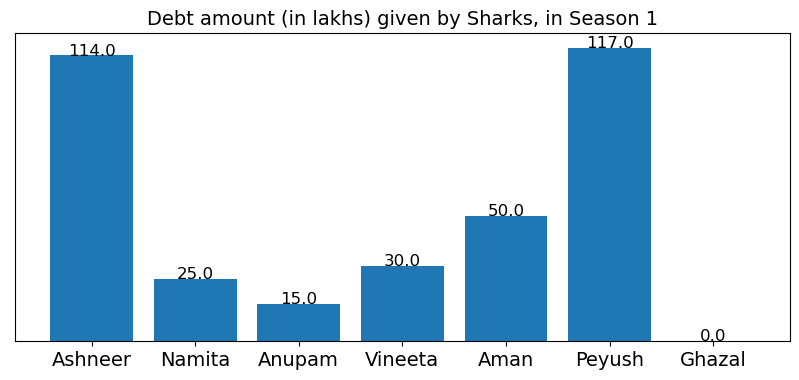

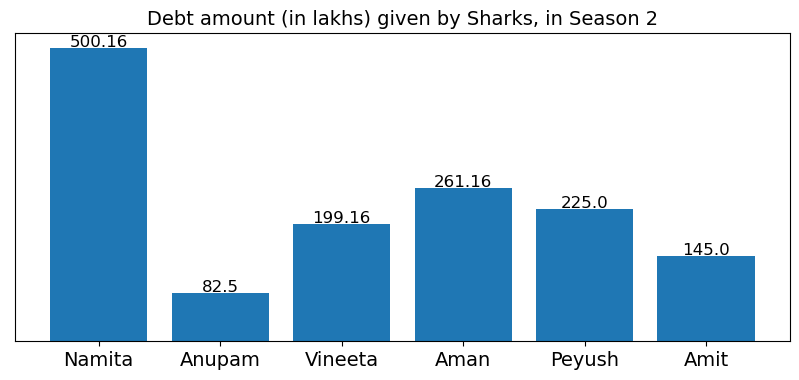

Namita gave 20% higher loan in season 2, compared to season 1


In [42]:
# Investment based on the  Debt/loaned Amount
# Season 1
debt = [shark_tank_season1['Ashneer Debt Amount'].sum(), shark_tank_season1['Namita Debt Amount'].sum(), shark_tank_season1['Anupam Debt Amount'].sum(), shark_tank_season1['Vineeta Debt Amount'].sum(),
    shark_tank_season1['Aman Debt Amount'].sum(), shark_tank_season1['Peyush Debt Amount'].sum(), shark_tank_season1['Ghazal Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total debt':debt}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(debt):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount (in lakhs) given by Sharks, in Season 1", fontsize=14)
plt.show()

# Season 2
debt = [shark_tank_season2['Namita Debt Amount'].sum(), shark_tank_season2['Anupam Debt Amount'].sum(), shark_tank_season2['Vineeta Debt Amount'].sum(),
    shark_tank_season2['Aman Debt Amount'].sum(), shark_tank_season2['Peyush Debt Amount'].sum(), shark_tank_season2['Amit Debt Amount'].sum()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total debt':debt}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total debt'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(debt):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount (in lakhs) given by Sharks, in Season 2", fontsize=14)
plt.show()

print("Namita gave 20% higher loan in season 2, compared to season 1")

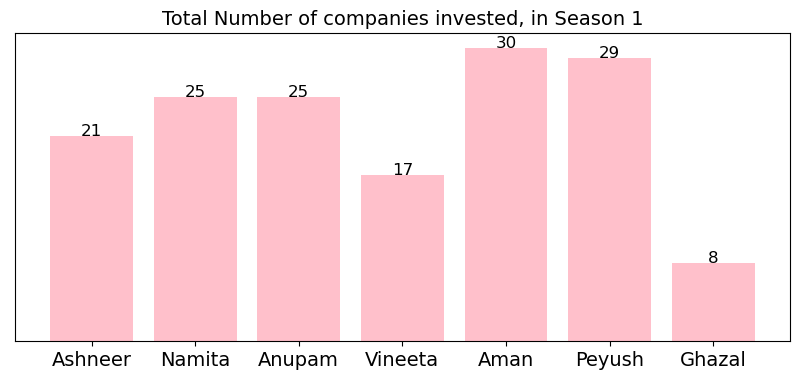

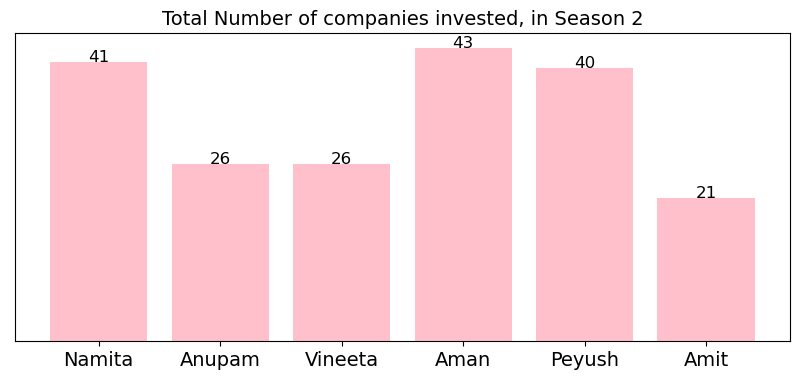

In [43]:
# Number of companies invested
# Season 1
Amount = [shark_tank_season1['Ashneer Investment Amount'].count(), shark_tank_season1['Namita Investment Amount'].count(), shark_tank_season1['Anupam Investment Amount'].count(), shark_tank_season1['Vineeta Investment Amount'].count(),
    shark_tank_season1['Aman Investment Amount'].count(), shark_tank_season1['Peyush Investment Amount'].count(), shark_tank_season1['Ghazal Investment Amount'].count()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Number of companies invested, in Season 1", fontsize=14)
plt.show()

# Season 2
Amount = [shark_tank_season2['Namita Investment Amount'].count(), shark_tank_season2['Anupam Investment Amount'].count(), shark_tank_season2['Vineeta Investment Amount'].count(),
    shark_tank_season2['Aman Investment Amount'].count(), shark_tank_season2['Peyush Investment Amount'].count(), shark_tank_season2['Amit Investment Amount'].count()]
name=['Namita','Anupam','Vineeta','Aman','Peyush','Amit']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Number of companies invested, in Season 2", fontsize=14)
plt.show()

# 🔥 Ashneer Grover's Investments

Total investments by Ashneer 21
Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

Company details:
---------------------------------------------------------------------------
      Startup Name                     Industry  Ashneer Investment Amount
     BluePineFoods                         Food                      25.00
      BoozScooters Vehicles/Electrical Vehicles                      20.00
         TagzFoods                         Food                      70.00
     SkippiIcePops                         Food                      20.00
 RaisingSuperstars                    Education                      50.00
       BeyondSnack                         Food                      25.00
      MotionBreeze Vehicles/Electrical Vehicles                      30.00
         EventBeep                    Education                      10.00
     TheYarnBazaar                Manufacturing             

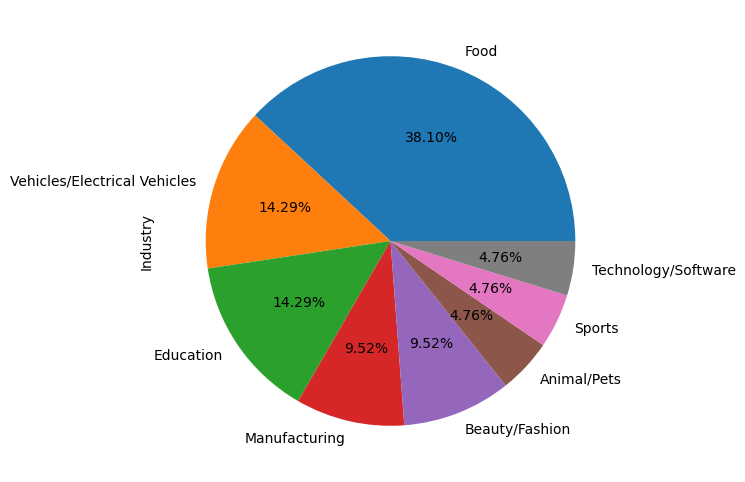

In [44]:
print("Total investments by Ashneer", shark_tank[shark_tank['Ashneer Investment Amount']>=0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>=0][["Startup Name","Industry","Ashneer Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>=0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Ashneer Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

#  🎆 Namita Thapar's Investments

Total investments by Namita 66
Investment amount by Namita 20.98 crores
Equity received by Namita 301.59 % in different companies
Debt/loan amount by Namita 5.25 crores

Company details:
---------------------------------------------------------------------------
      Startup Name             Industry  Namita Investment Amount
       JhaJiAchaar                 Food                 28.300000
            Bummer       Beauty/Fashion                 37.500000
     SkippiIcePops                 Food                 20.000000
      Menstrupedia            Education                 50.000000
             Altor        Manufacturing                 25.000000
           Nuutjob       Beauty/Fashion                  8.330000
             Farda       Beauty/Fashion                 15.000000
              Auli       Beauty/Fashion                 75.000000
             Annie            Education                 35.000000
   TheRenalProject       Medical/Health                 50.000000
           

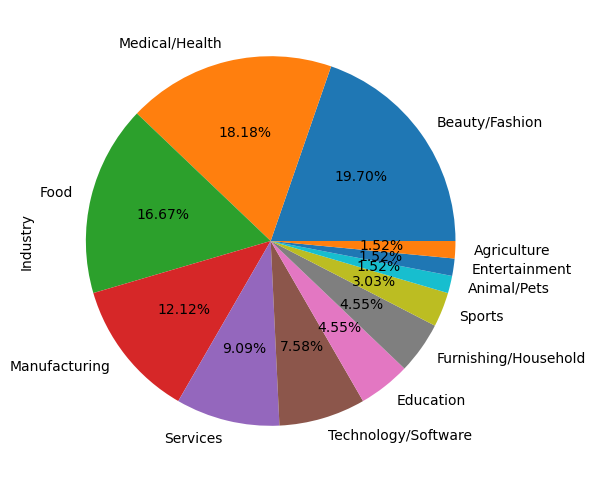

In [45]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Namita Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

# ㊂ Anupam Mittal's Investments

Total investments by Anupam 51
Investment amount by Anupam 14.51 crores
Equity received by Anupam 305.83 % in different companies
Debt/loan amount by Anupam 0.98 crores

Company details:
---------------------------------------------------------------------------
          Startup Name                     Industry  Anupam Investment Amount
      HeartUpMySleeves               Beauty/Fashion                 12.500000
                 CosIQ               Beauty/Fashion                 25.000000
            RevampMoto Vehicles/Electrical Vehicles                 50.000000
         SkippiIcePops                         Food                 20.000000
                Kavach                    Education                  2.500000
    VivalyfInnovations               Medical/Health                 28.000000
              Meatyour                         Food                 10.000000
ARRCOATSurfaceTextures                Manufacturing                 50.000000
                  LOKA          Tec

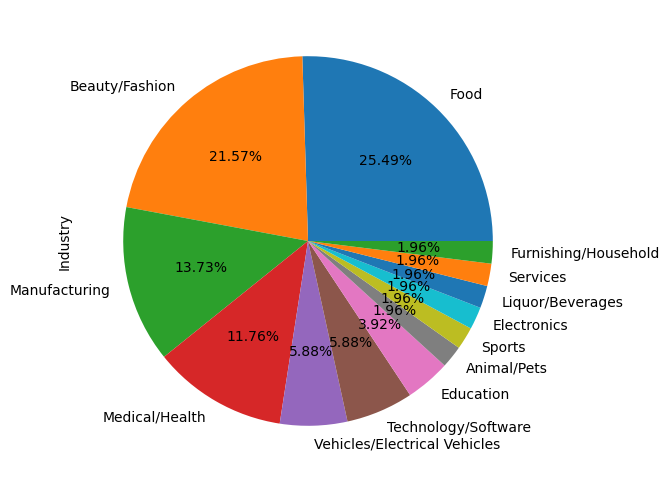

In [46]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>=0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>=0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>=0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Anupam Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

#  🎇 Vineeta Singh's Investments
Vineeta's portfolio has 40% Food industry and 23% Beauty/Fashion industry

Total investments by Vineeta 43
Investment amount by Vineeta 11.71 crores
Equity received by Vineeta 242.3 % in different companies
Debt/loan amount by Vineeta 2.29 crores

Company details:
---------------------------------------------------------------------------
      Startup Name                     Industry  Vineeta Investment Amount
     BluePineFoods                         Food                      25.00
      BoozScooters Vehicles/Electrical Vehicles                      20.00
  HeartUpMySleeves               Beauty/Fashion                      12.50
              NOCD                         Food                      20.00
             CosIQ               Beauty/Fashion                      25.00
       JhaJiAchaar                         Food                      28.30
     SkippiIcePops                         Food                      20.00
        Get-A-Whey                         Food                      33.33
    TheQuirkyNaari               Beauty/Fashion            

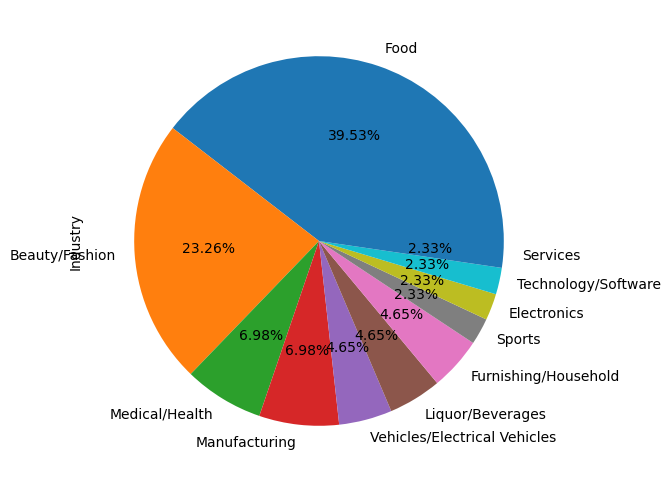

In [47]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Vineeta Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

# 🚀 Aman Gupta's Investments

Total investments by Aman 73
Investment amount by Aman 25.1 crores
Equity received by Aman 260.93 % in different companies
Debt/loan amount by Aman 3.11 crores

Company details:
---------------------------------------------------------------------------
      Startup Name                     Industry  Aman Investment Amount
     BluePineFoods                         Food               25.000000
         Peeschute               Beauty/Fashion               75.000000
            Bummer               Beauty/Fashion               37.500000
        RevampMoto Vehicles/Electrical Vehicles               50.000000
     SkippiIcePops                         Food               20.000000
 RaisingSuperstars                    Education               50.000000
            Kavach                    Education                2.500000
       BeyondSnack                         Food               25.000000
             Altor                Manufacturing               25.000000
             Ariro        

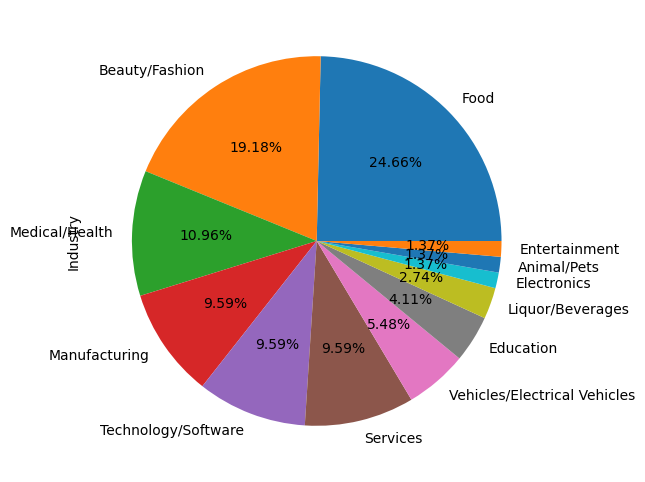

In [48]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>=0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>=0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>=0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Aman Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

# 🎾 Peyush Bansal's Investments

Investment amount by Peyush 22.1 crores
Equity received by Peyush 422.11 % in different companies
Debt/loan amount by Peyush 3.42 crores

Company details:
---------------------------------------------------------------------------
      Startup Name                     Industry  Peyush Investment Amount
VivalyfInnovations               Medical/Health                 28.000000
             Ariro                Manufacturing                 25.000000
           Nuutjob               Beauty/Fashion                  8.330000
          Meatyour                         Food                 10.000000
         EventBeep                    Education                 10.000000
              LOKA          Technology/Software                 13.330000
             Annie                    Education                 35.000000
        Carragreen                Manufacturing                 25.000000
     TheYarnBazaar                Manufacturing                 25.000000
               PNT          T

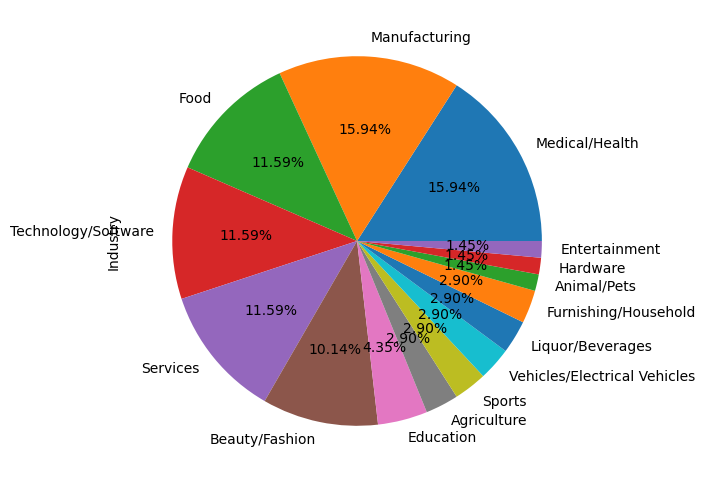

In [49]:
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>=0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>=0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peyush Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

# 🎯 Ghazal Alagh's Investments

Total investments by Ghazal  8
Investment amount by Ghazal 1.6 crores
Equity received by Ghazal 51.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

Company details:
---------------------------------------------------------------------------
      Startup Name       Industry  Ghazal Investment Amount
        TheSassBar Beauty/Fashion                 25.000000
SunfoxTechnologies Medical/Health                 20.000000
 WattTechnovations Medical/Health                  0.000253
           HumpyA2           Food                 33.330000
 GoldSafeSolutions  Manufacturing                 16.660000
        WakaoFoods           Food                 25.000000
  NomadFoodProject           Food                 10.000000
           WitBlox  Manufacturing                 30.000000
---------------------------------------------------------------------------

Ghazal industry wise investments

Food              3
Medical/Health    2
Manufacturing     2
Beauty/Fashion    1
Name: Indus

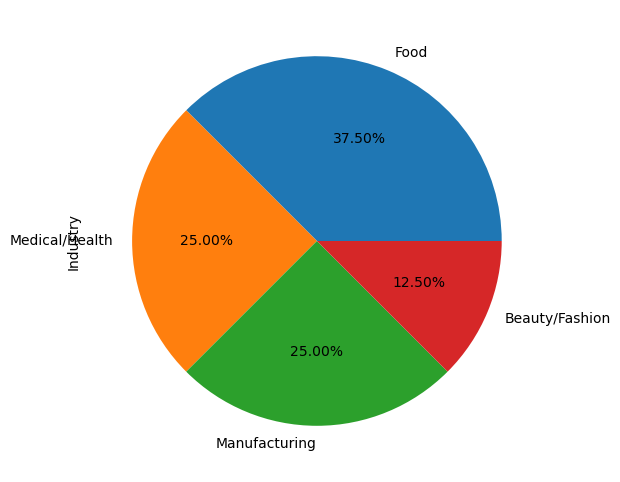

In [50]:
print("Total investments by Ghazal", shark_tank[shark_tank['Ghazal Investment Amount']>=0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nGhazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Ghazal Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

# ✳️ Amit Jain's Investments

Total investments by Amit 21
Investment amount by Amit 8.01 crores
Equity received by Amit 109.0 % in different companies
Debt/loan amount by Amit 1.45 crores

Company details:
---------------------------------------------------------------------------
 Startup Name                     Industry  Amit Investment Amount
    InsideFPV                Manufacturing                   18.75
    Angrakhaa               Beauty/Fashion                   40.00
    MoppFoods                         Food                   75.00
       Dobiee                         Food                   72.00
        Pflow               Medical/Health                   30.00
       ekatra         Furnishing/Household                   10.00
    licksters                         Food                   25.00
   ScrapUncle                     Services                   60.00
       UnStop          Technology/Software                   50.00
  Cakelicious                         Food                   25.00
     Hornb

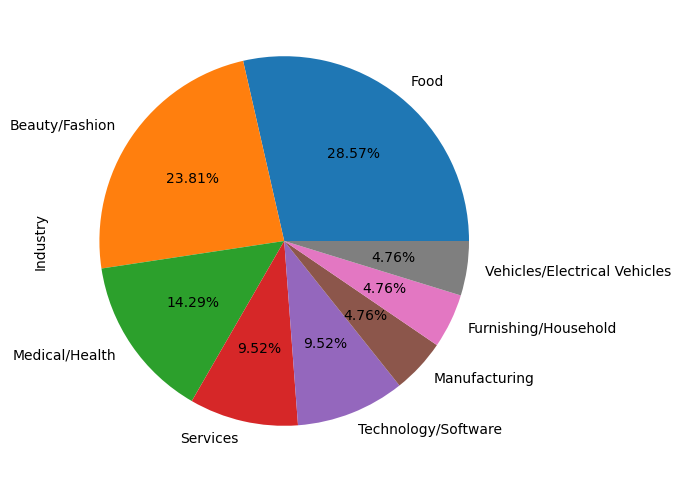

In [51]:
print("Total investments by Amit", shark_tank[shark_tank['Amit Investment Amount']>=0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Amit", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Amit", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAmit industry wise investments\n")
print(shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Amit Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

2.0    24
1.0    22
3.0    15
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

2.0    34%
1.0    31%
3.0    21%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object


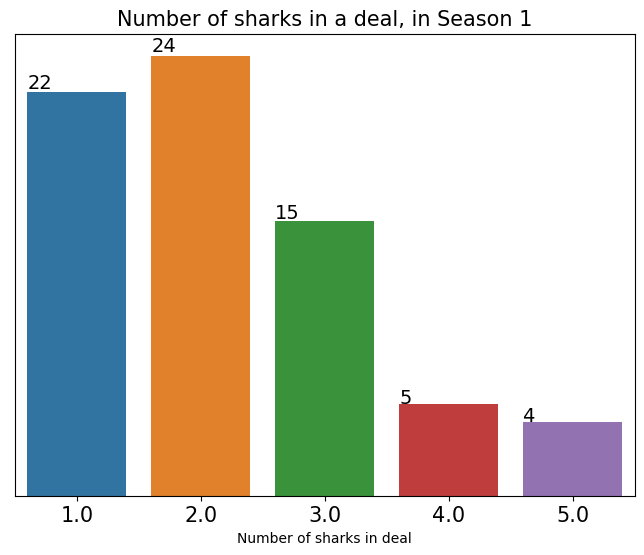

In [52]:
# Number of sharks in a deal, in Season 1
print(shark_tank_season1['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank_season1['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in Season 1", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank_season1, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01), size=14)

1.0    52
2.0    30
3.0    13
4.0     7
5.0     4
Name: Number of sharks in deal, dtype: int64 

1.0    49%
2.0    28%
3.0    12%
4.0     7%
5.0     4%
Name: Number of sharks in deal, dtype: object


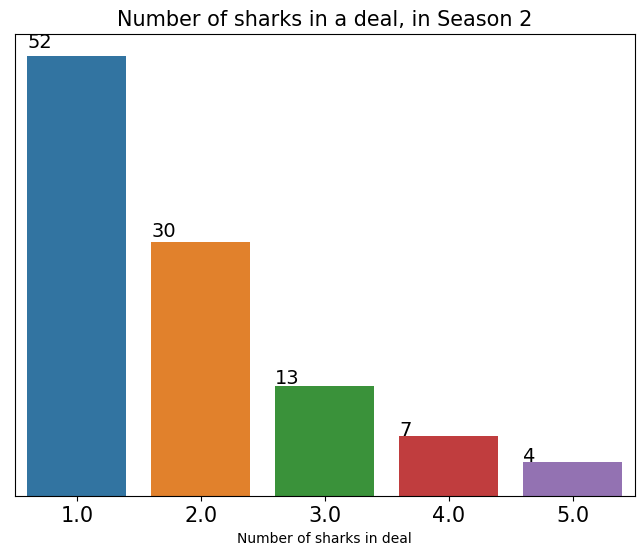

In [53]:
# Number of sharks in a deal, in Season 2
print(shark_tank_season2['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank_season2['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in Season 2", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank_season2, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [54]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])
     

     Season Number        Startup Name  Total Deal Amount  Total Deal Equity
15               1       SkippiIcePops              100.0               15.0
50               1  FindYourKicksIndia               50.0               25.0
64               1              INACAN              100.0               10.0
80               1  SunfoxTechnologies              100.0                6.0
209              2              Snitch              150.0                1.5
239              2            Mahantam               30.0               20.0
274              2         Pharmallama              200.0                5.0
311              2           Sahayatha              100.0               10.0


In [55]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains('Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Namita did most number of solo deals

Namita Investment Amount    20
Peyush Investment Amount    14
Aman Investment Amount      12
dtype: int64

In [56]:
# Sharks
# tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 2][amt_cols].stack()
# tmp
# tmp2 = shark_tank.loc[shark_tank['Number of sharks in deal'] == 2][amt_cols].transpose()
# tmp2

Maharashtra          96
Delhi                46
Karnataka            37
Gujarat              33
Haryana              21
West Bengal          15
Uttar Pradesh        15
Telangana            14
Rajasthan            11
Punjab                9
Tamil Nadu            8
Madhya Pradesh        6
Bihar                 4
Kerala                3
Jammu & Kashmir       3
Goa                   3
Uttarakhand           2
Jharkhand             2
Chhattisgarh          2
Himachal Pradesh      1
Andhra Pradesh        1
Arunachal Pradesh     1
Name: Pitchers State, dtype: int64 



<AxesSubplot:>

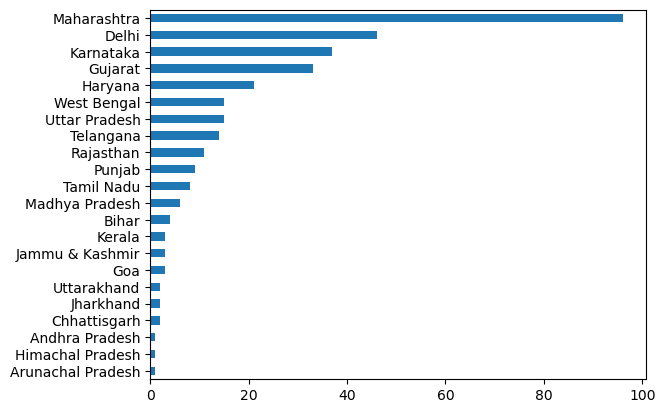

In [57]:
print(shark_tank['Pitchers State'].str.split(',').explode('Pitchers State').value_counts(), "\n")
shark_tank['Pitchers State'].str.split(',').explode('Pitchers State').value_counts().sort_values().plot.barh()

In [58]:
# Top 20 Indian Cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [59]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (in lakhs) and Number times asked

Original Ask Amount
50.0     77
100.0    51
75.0     46
40.0     21
30.0     14
60.0     14
150.0    14
80.0     13
90.0      8
25.0      7
dtype: int64

In [60]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
1.0     60
5.0     52
2.0     44
10.0    36
3.0     25
4.0     19
2.5     17
0.5     12
7.5     11
1.5     10
dtype: int64

In [61]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (in lakhs) and Number times invested

Total Deal Amount
50.0     41
100.0    29
75.0     17
40.0     12
30.0     10
60.0      9
25.0      8
20.0      5
80.0      5
150.0     5
dtype: int64

In [62]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
10.0    25
20.0    15
5.0     14
15.0    12
1.0     11
2.0     11
3.0     11
4.0     10
6.0      7
2.5      6
dtype: int64

In [63]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)


Original Ask Amount  Original Offered Equity
50.0                 5.0                        12
100.0                1.0                        10
50.0                 2.0                         7
75.0                 4.0                         7
100.0                2.0                         7
50.0                 1.0                         6
                     3.0                         6
                     10.0                        6
                     4.0                         5
30.0                 10.0                        4
dtype: int64

In [64]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (in lakhs) and Number times asked (but rejected by sharks)

Original Ask Amount
50.0     28
100.0    17
75.0     15
40.0      6
60.0      5
25.0      4
80.0      4
90.0      4
20.0      3
35.0      3
dtype: int64

In [65]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by sharks)

Original Offered Equity
5.0     21
1.0     19
10.0    13
2.0      8
2.5      8
3.0      7
1.5      4
7.5      4
15.0     4
8.0      3
dtype: int64

In [66]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(5)

# If you are pitching in Shark Tank India, don't ask for 1 lakh with 1% equity or 50K with 5%/10% equity

Original Ask Amount  Original Offered Equity
100.0                1.0                        8
50.0                 5.0                        7
                     10.0                       5
75.0                 5.0                        5
50.0                 2.0                        3
dtype: int64

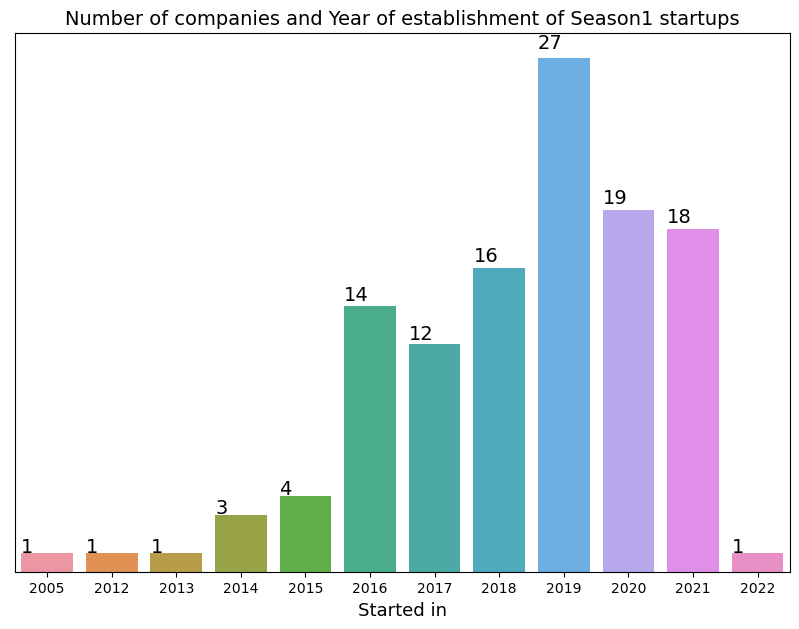

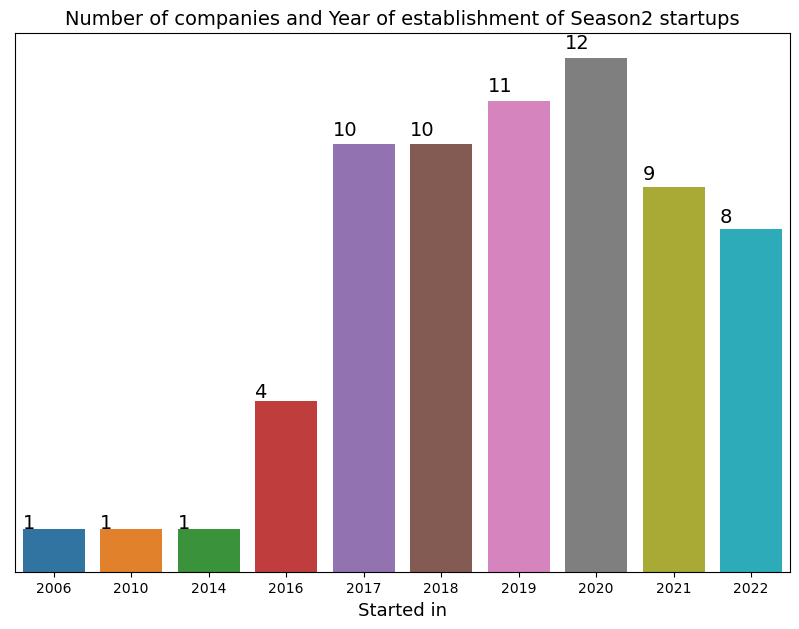

In [69]:
# Season 1 Startup companies started in year
fig = plt.figure(figsize=(10, 7))
plt.title('Number of companies and Year of establishment of Season1 startups', size=14)
tmp = shark_tank_season1.loc[shark_tank_season1['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
ax.set_xlabel('Started in', fontsize=13)
plt.yticks([])
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)
        
# Season 2 Startup companies started in year
fig = plt.figure(figsize=(10, 7))
plt.title('Number of companies and Year of establishment of Season2 startups', size=14)
tmp2 = shark_tank_season2.loc[shark_tank_season2['Started in'].notnull()]
ax = sns.countplot(data = tmp2, x = 'Started in')
ax.set_xlabel('Started in', fontsize=13)
plt.yticks([])
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [70]:
# Few companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]


Startup Name  Original Ask Amount  Total Deal Amount
0       BluePineFoods                 50.0               75.0
10        JhaJiAchaar                 50.0               56.6
15      SkippiIcePops                 45.0              100.0
37              Annie                 30.0              105.0
39      TheYarnBazaar                 50.0              100.0
43    HammerLifestyle                 30.0              100.0
59            WeSTOCK                 50.0               60.0
64             INACAN                 50.0              100.0
76         TheSassBar                 40.0               50.0
89            HumpyA2                 75.0              100.0
109         TweekLabs                 40.0               60.0
110            Proxgy                 35.0              100.0
118          SneaKare                 20.0               21.0
152             Hoovu                 80.0              100.0
161    GearHeadMotors                 75.0              100.0
178       Zillionaire                 50.0              100.0
216          Broomees                 80.0              100.0
219           PadCare                 50.0              100.0
223            Geeani                 75.0              100.0
230            UnStop                100.0              200.0
240         MindPeers                 53.0              106.0
257           CureSee                 40.0               50.0
274       Pharmallama                100.0              200.0
283  What'sUpWellness                 50.0               60.0

In [71]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]


Startup Name  Valuation Requested  Deal Valuation
20              Kavach                 50.0            50.0
22         BeyondSnack               2000.0          2000.0
45             Cocofit                  0.0             0.0
86   WattTechnovations                  0.0             0.0
171     TheSimplySalad                300.0           300.0
185            Janitri               4000.0          4000.0
203          NeoMotion              10000.0         10000.0
219            PadCare               2500.0          2500.0
223             Geeani               1000.0          1000.0
240          MindPeers               5300.0          5300.0
243        DhruvVidyut                  0.0             0.0
253    TheHealthyBinge               1000.0          1000.0
311          Sahayatha               1000.0          1000.0
314           NishHair               5000.0          5000.0

In [72]:
# There is NO company which got more valuation than they pitched, JhaJi Achaar received after the Season (in 2023)
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]


Startup Name  Valuation Requested  Deal Valuation
10  JhaJiAchaar                500.0          1007.0

In [73]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]


Season Number Season Start Season End  Episode Number  \
24               1    20-Dec-21  04-Feb-22               8   
42               1    20-Dec-21  04-Feb-22              14   
83               1    20-Dec-21  04-Feb-22              26   
98               1    20-Dec-21  04-Feb-22              30   
100              1    20-Dec-21  04-Feb-22              31   
114              1    20-Dec-21  04-Feb-22              34   
131              1    20-Dec-21  04-Feb-22               0   
205              2    02-Jan-23  10-Mar-23              18   
206              2    02-Jan-23  10-Mar-23              19   
257              2    02-Jan-23  10-Mar-23              34   
264              2    02-Jan-23  10-Mar-23              36   
277              2    02-Jan-23  10-Mar-23              40   
295              2    02-Jan-23  10-Mar-23              44   

                                Episode Title  Pitch Number     Startup Name  \
24          Shark Ko Impress Karne Wale Ideas            25     MotionBreeze   
42                    Naye Aur Nayab Pitchers            43    GoodGoodPiggy   
83                        Revolutionary Ideas            84  JulaaAutomation   
98                        Sharks Ki Expertise            99         Scholify   
100                  Entrepreneurship Ki Raah           101       Sabjikothi   
114                         Scaling Ambitions           115          On2Cook   
131                                    Unseen           132        Scintiglo   
205             Business Ideas With Potential           206         Sayonara   
206                 Building Brands For India           207              PMV   
257  Growing Ideas Into Successful Businesses           258          CureSee   
264           Anokhe Pitchers Ke Anokhe Ideas           265        HoloKitab   
277              Creating Valuable Businesses           278             Hood   
295                Entrepreneurship Ka Junoon           296        WaggyZone   

                         Industry  \
24   Vehicles/Electrical Vehicles   
42            Technology/Software   
83                  Manufacturing   
98                      Education   
100                 Manufacturing   
114                          Food   
131                Medical/Health   
205                Beauty/Fashion   
206  Vehicles/Electrical Vehicles   
257                Medical/Health   
264           Technology/Software   
277           Technology/Software   
295                   Animal/Pets   

                                  Business Description  \
24                           Smart Electric Motorcycle   
42                                  Digital Piggy Bank   
83                                    Automatic Cradle   
98                                Scholarship Platform   
100                      Vegetables Storage SaptKrishi   
114                             Fastest Cooking Device   
131  Diagnostic device for microalbuminuria estimation   
205                                          Petticoat   
206                          Personal Mobility Vehicle   
257  Artificial Intelligence (AI) based vision therapy   
264                Augmented Reality content for books   
277                        Pseudonymous social network   
295         Ice Cream Treat for Dogs, Puppies and Cats   

                      Company Website  Number of Presenters  Male Presenters  \
24   https://www.motionautomotive.in/                     4                4   
42         https://goodgoodpiggy.com/                     2             <NA>   
83    https://www.automaticjulaa.com/                     3                3   
98            https://scholifyme.com/                     1                1   
100       https://www.saptkrishi.com/                     2                1   
114              https://on2cook.com/                     1                1   
131                  https://cemd.in/                     1                1   
205                               NaN      

In [74]:
# Some companies were on burning/paying money from their pocket, without any profit (as of pitching day)
shark_tank.loc[shark_tank['Yearly Revenue'] < 0]

Season Number Season Start Season End  Episode Number  \
137              1    20-Dec-21  04-Feb-22               0   
140              1    20-Dec-21  04-Feb-22               0   
157              2    02-Jan-23  10-Mar-23               2   
165              2    02-Jan-23  10-Mar-23               5   
194              2    02-Jan-23  10-Mar-23              15   
196              2    02-Jan-23  10-Mar-23              16   
208              2    02-Jan-23  10-Mar-23              19   
214              2    02-Jan-23  10-Mar-23              21   
219              2    02-Jan-23  10-Mar-23              23   
232              2    02-Jan-23  10-Mar-23              27   
241              2    02-Jan-23  10-Mar-23              29   
247              2    02-Jan-23  10-Mar-23              31   
253              2    02-Jan-23  10-Mar-23              33   
254              2    02-Jan-23  10-Mar-23              33   
255              2    02-Jan-23  10-Mar-23              34   
262              2    02-Jan-23  10-Mar-23              36   
273              2    02-Jan-23  10-Mar-23              39   
279              2    02-Jan-23  10-Mar-23              40   
284              2    02-Jan-23  10-Mar-23              42   
292              2    02-Jan-23  10-Mar-23              44   
302              2    02-Jan-23  10-Mar-23              46   
309              2    02-Jan-23  10-Mar-23              48   
312              2    02-Jan-23  10-Mar-23              49   
315              2    02-Jan-23  10-Mar-23              50   
316              2    02-Jan-23  10-Mar-23              51   
317              2    02-Jan-23  10-Mar-23              51   

                                     Episode Title  Pitch Number  \
137                                         Unseen           138   
140                                         Unseen           141   
157                                A Bigger Vision           158   
165               Investing in the Future of India           166   
194   Changing The Face Of Indian Entrepreneurship           195   
196                           Pitchers Ki Taiyyari           197   
208                      Building Brands For India           209   
214               Adhbhut Aur Anokhe Entrepreneurs           215   
219                             Changing The World           220   
232                         Nayi Soch Naye Vichaar           233   
241                           Pulse Of The Country           242   
247                    Innovations And Investments           248   
253                             Growing With India           254   
254                             Growing With India           255   
255       Growing Ideas Into Successful Businesses           256   
262                Anokhe Pitchers Ke Anokhe Ideas           263   
273  Revolutionary Ideas And Successful Businesses           274   
279                   Creating Valuable Businesses           280   
284               Building Businesses From Scratch           285   
292                     Entrepreneurship Ka Junoon           293   
302          Different Colours Of Entrepreneurship           303   
309           Pitchers, Investments And Businesses           310   
312             Businesses Adding Value To Society           313   
315                  Season Finale With The Sharks           316   
316                    Gateway To Shark Tank India           317   
317                    Gateway To Shark Tank India           318   

          Startup Name                      Industry  \
137       ZyppElectric  Vehicles/Electrical Vehicles   
140           HappyBar                          Food   
157              SoupX                          Food   
165          Flatheads                Beauty/Fashion   
194         FastBeetle                      Services   
196             VSMani                          Food   
208          Bullspree           Technology/Software   
214        CloudTailor                      S

In [75]:
# Top 15 Highest Yearly Revenue brands, in season 1
print(shark_tank_season1.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

tmpdf = shark_tank_season1.sort_values('Yearly Revenue', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue (in lakhs) of participated startups, in Season 1</b>", text=tmpdf['Yearly Revenue'])
fig.show()

Startup Name
FrenchCrown          7200
GuardianGears        2500
RaisingSuperstars    1300
Eume                 1200
PlayBoxTV            1020
Alpino               1000
HammerLifestyle      1000
ShadesofSpring        900
TagzFoods             700
Devnagri              500
Moonshine             372
Get-A-Whey            360
Ariro                 300
PDDFalcon             272
Mine4Nine             260
Name: Yearly Revenue, dtype: Int32


In [76]:
# Top 15 Highest Yearly Revenue brands, in season 2
print(shark_tank_season2.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

tmpdf = shark_tank_season2.sort_values('Yearly Revenue', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue (in lakhs) of participated startups, in Season 2</b>", text=tmpdf['Yearly Revenue'])
fig.show()

Startup Name
Rubans               5100
Toyshine             4500
GunjanAppsStudios    2400
UnStop               1600
StyloBug             1400
DesmondJi            1200
oyehappy             1005
BlueTea              1000
Aadvik                720
NishHair              670
ScrapUncle            600
NeoMotion             470
SpiceStory            410
Paradyes              350
UpThrust              300
Name: Yearly Revenue, dtype: Int32


In [77]:
# Top 15 highest Gross Margin brands, in all seasons
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin (in %) of the brands (in all seasons)</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150
Farda                 115
Cocofit                95
UnStop                 90
MidNightAngelsByPC     83
Auli                   80
LeafyAffair            80
Pflow                  80
ekatra                 80
oyehappy               80
CosIQ                  75
Dabble                 75
JaipurWatchCompany     75
TheaandSid             75
Bummer                 70
Name: Gross Margin, dtype: Int32


In [80]:
# Top 15 highest Net Margin brands, in all seasons
print(shark_tank.groupby('Startup Name')['Net Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Net Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Net Margin', color="Startup Name", template='simple_white', title="<b>Highest Net margin (in %) of the brands</b>", text=tmpdf['Net Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Cakelicious           40
TwistingScoops        40
SharmaJiKiAata        38
DrCubes               35
Pabiben               35
VAPerfume             35
NishHair              30
UpThrust              30
ekatra                28
Tipayi                26
Flhexible             25
MeduLance             24
eyenic                21
Febris                20
MidNightAngelsByPC    20
Name: Net Margin, dtype: Int32


In [81]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [82]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.23.5
# pandas version: 1.5.3
# matplotlib version: 3.6.3
# seaborn version: 0.12.2
# plotly version: 5.14.1

numpy version: 1.20.3
pandas version: 1.3.4
matplotlib version: 3.4.3
seaborn version: 0.11.2
plotly version: 5.15.0


# Data set values verification (you can ignore below section)
below queries should not return any rows

In [83]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'] + shark_tank['Transgender Presenters'].fillna(0)]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [84]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [85]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [86]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [87]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [88]:
shark_tank.loc[(shark_tank['Accepted Offer'].isnull()) & (shark_tank['Number of sharks in deal'] >= 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [89]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0) + shark_tank['Amit Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [90]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0) + shark_tank['Amit Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0),1)]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [91]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0) + shark_tank['Amit Debt Amount'].fillna(0) + shark_tank['Guest Debt Amount'].fillna(0),1)]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [92]:
shark_tank.loc[(shark_tank['Received Offer'] == 1) & (shark_tank['Accepted Offer'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [93]:
shark_tank.loc[(shark_tank['Received Offer'] == 0) & (shark_tank['Accepted Offer'].notnull())]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [94]:
shark_tank.loc[shark_tank['Number of sharks in deal'].fillna(0).round(0).astype(int) != shark_tank['Ashneer Investment Amount'].notnull().astype("int") + shark_tank['Namita Investment Amount'].notnull().astype("int") + shark_tank['Anupam Investment Amount'].notnull().astype("int") + shark_tank['Vineeta Investment Amount'].notnull().astype("int") + shark_tank['Aman Investment Amount'].notnull().astype("int") + shark_tank['Peyush Investment Amount'].notnull().astype("int") + shark_tank['Ghazal Investment Amount'].notnull().astype("int") + shark_tank['Amit Investment Amount'].notnull().astype("int") + shark_tank['Guest Investment Amount'].notnull().astype("int")]


Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [95]:
shark_tank.loc[(shark_tank['Couple Presenters'] != 0) & (shark_tank['Couple Presenters'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [98]:
shark_tank.loc[(shark_tank['Received Offer'] != 0) & (shark_tank['Received Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]

In [97]:
shark_tank.loc[(shark_tank['Accepted Offer'] != 0) & (shark_tank['Accepted Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Episode Title, Pitch Number, Startup Name, Industry, Business Description, Company Website, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Started in, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of sharks in deal, Deal has conditions, Has Patents, Ashneer Investment Amount, Ashneer Investment Equity, Ashneer Debt Amount, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ghazal Investment Amount, Ghazal Investment Equity, Ghazal Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Guest Name]
Index: []

[0 rows x 64 columns]